<center> <h1> <b>BIRDSONGS<b></h1> </center>
<center> <h1>Motor Gestures Tutorial</h1> </center>

# Define Syllable and BirdSong Objects

Import package and define matplotlib backend

In [1]:
# the following line enable interact with figures, 
# you can make zoom and save images from a poup matplotlib window
#notebook qt ipympl tk qt
%matplotlib inline

import birdsongs as bs
from birdsongs.utils import *

Define paths and ploter objects. Select file number

In [2]:
# root_path   = "path_to_repository\\'
# audios_path = "audios_path\\'
# bird_name   = "Zonotrichia capensis"
# audios_path = "C:\\Users\\sebas\\Documents\\GitHub\\audios\\Dissertation-xeno\\"

paths  = bs.Paths()       # root_path, audios_path, bird_name
ploter = bs.Ploter()      # to save figures save=True 
paths.ShowFiles()         # or paths.data if the file has a spredsheet 
no_file = 1 # int(input("Enter the number of song (1 to {0}): ".format(paths.no_files)))

The folder has 4 songs:
0-humman.wav
1-XC104508 - Ocellated Tapaculo - Acropternis orthonyx.wav
2-XC11293 - Rufous-collared Sparrow - Zonotrichia capensis.wav
3-XC513182 - Rufous-collared Sparrow - Zonotrichia capensis.wav


Define the birdsong object and select the time interval of interest (syllable)

C:\Users\sebas\anaconda3\lib\site-packages\maad\sound\input_output.py:113: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, s = wavfile.read(filename)


The son has 36 syllables


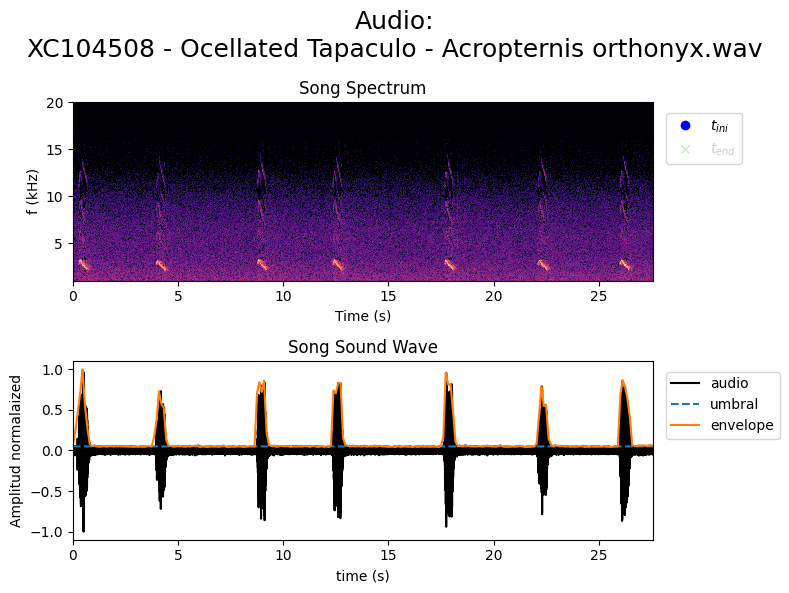

In [3]:
birdsong = bs.BirdSong(paths, no_file=no_file, Nt=5000, umbral=0.05, 
                       flim=(1e3,20e3), split_method="amplitud")
ploter.Plot(birdsong, FF_on=False, SelectTime_on=True)

Select the time interval for the syllable object. Then, define, visualize, and listen the syllable object (or birdsong)

Time interval selected: initial time 3.9106 s, final time 4.3684 s


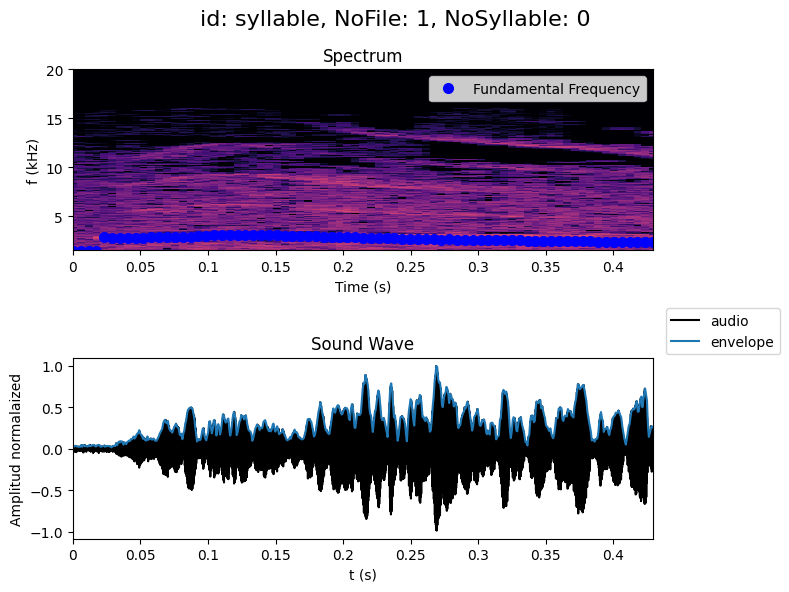

Wall time: 5.33 s


In [4]:
%%time
# time_interval = Positions(ploter.klicker)[0]
time_interval = np.array([3.9106138 , 4.36835408])
print("Time interval selected: initial time {:.4f} s, final time {:.4f} s".format(time_interval[0], time_interval[1]))

syllable = bs.Syllable(birdsong, tlim=time_interval, umbral_FF=0.1, NN=birdsong.NN, Nt=30, ide="syllable")
ploter.Plot(syllable, FF_on=True)
AudioPlay(syllable)

# Totally Synthetic

For the trachea simulation, a known function is used (the signal envelope) as an external pressure. This python implementation allows to us to test different input functions, but you can use instead the previously syllable defined

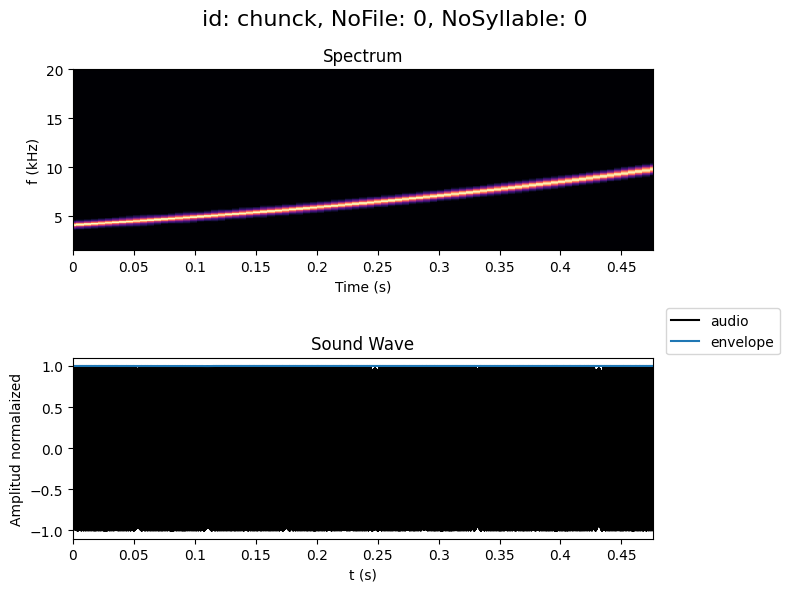

name,value,initial value,min,max,vary
a0,0.11000000,0.11,0.01000000,0.25000000,False
a1,0.05000000,0.05,-2.00000000,2.00000000,False
a2,0.00000000,0.0,0.00000000,2.00000000,False
b0,-0.10000000,-0.1,-1.00000000,0.50000000,False
b1,1.00000000,1,0.00000000,2.00000000,False
b2,0.00000000,0.0,0.00000000,2.00000000,False
gm,40000.0000,40000.0,10000.0000,100000.000,False


In [5]:
fs = 44100 # sample rate,
T  = 0.5   # duration of signal
t  = np.linspace(0, T, int(T*fs))

s_tone = librosa.tone(frequency=5000, sr=fs, duration=T) #+ librosa.tone(frequency=10000, sr=fs, duration=T)
s_chirp = librosa.chirp(fmin=4000, fmax=10000, sr=fs, linear=False, duration=T)

s = s_chirp
digital_syllable = bs.Syllable(sfs=[s, fs], ide="chunck")
digital_syllable.paths = paths

ploter.Plot(digital_syllable, FF_on=False);
Display(digital_syllable.p); AudioPlay(digital_syllable);

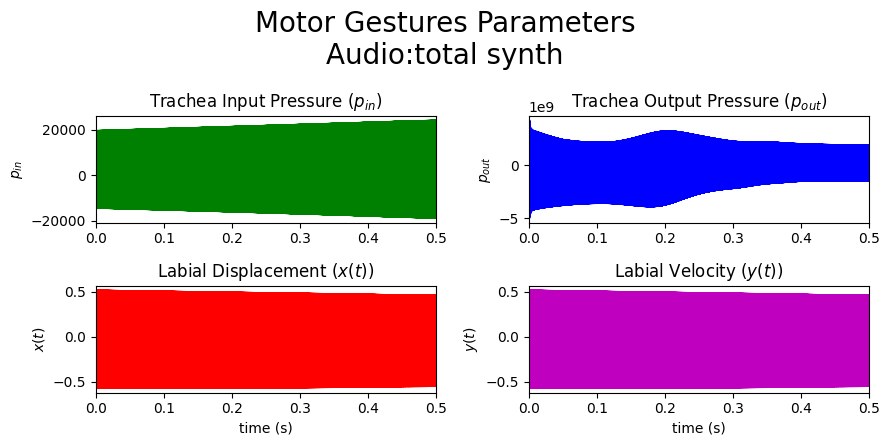

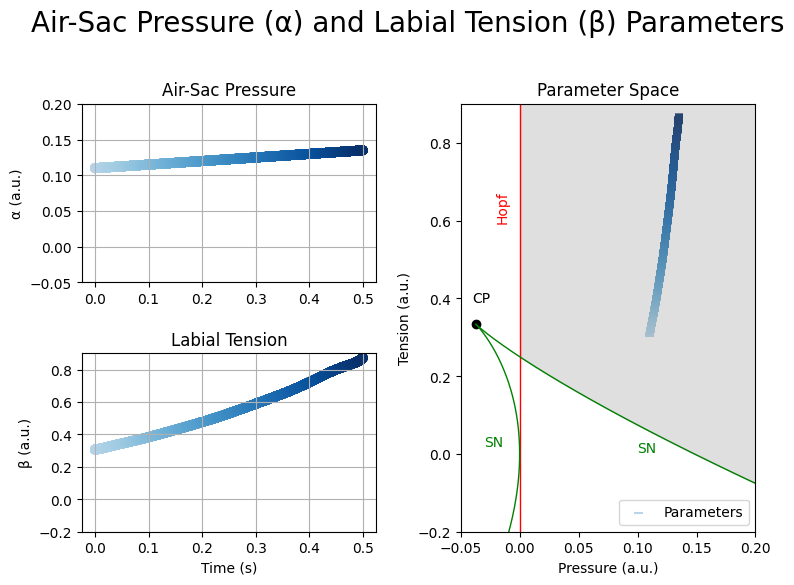

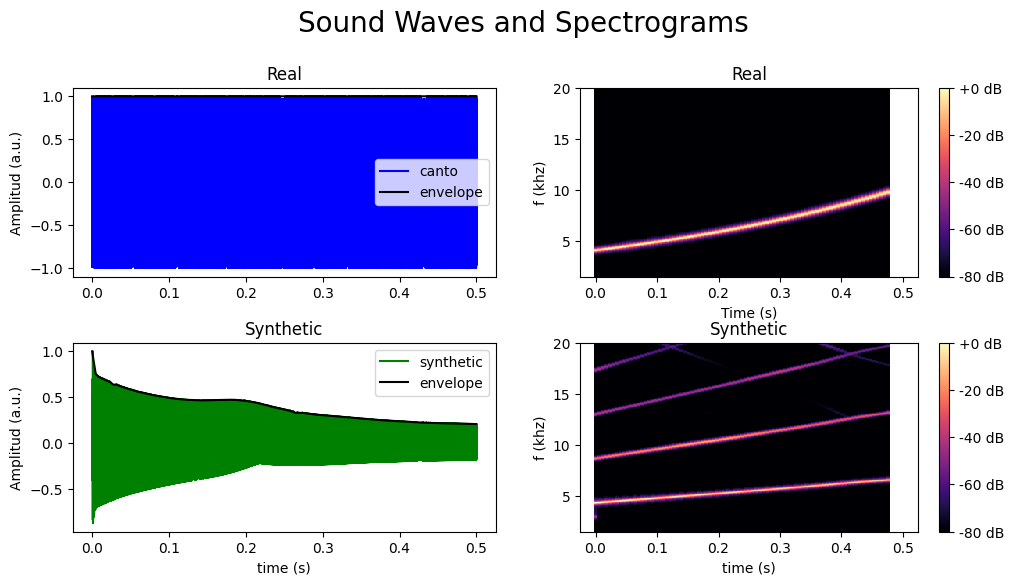

In [6]:
digital_syllable_synth = digital_syllable.Solve(digital_syllable.p)

ploter.PlotVs(digital_syllable_synth)
ploter.PlotAlphaBeta(digital_syllable_synth)
ploter.Syllables(digital_syllable, digital_syllable_synth)
AudioPlay(digital_syllable_synth)

# Varying Parameters

Inital coefficient parameters values. You can modify any value, limit, or parameter property. To use the audio signal change the obj to the syllable

In [15]:
obj = digital_syllable  # syllable
obj.paths = paths
Display(obj.p)
# syllable.p["variable_name"].set(value=value, min=min, etc)

name,value,initial value,min,max,vary
a0,0.11000000,0.11,0.01000000,0.25000000,False
a1,0.05000000,0.05,-2.00000000,2.00000000,False
a2,0.00000000,0.0,0.00000000,2.00000000,False
b0,-0.10000000,-0.1,-1.00000000,0.50000000,False
b1,1.00000000,1,0.00000000,2.00000000,False
b2,0.00000000,0.0,0.00000000,2.00000000,False
gm,40000.0000,40000.0,10000.0000,100000.000,False


## Varying Time Scale Constant $\gamma$


### Low

$\gamma = 1000$

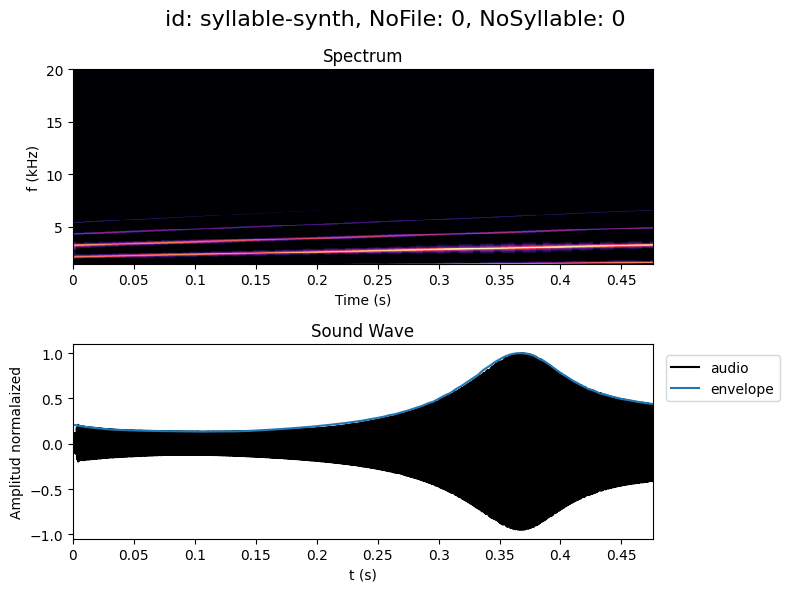

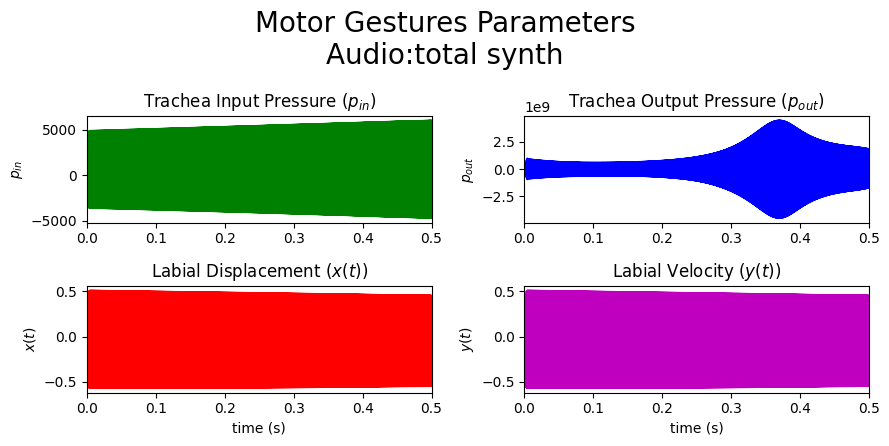

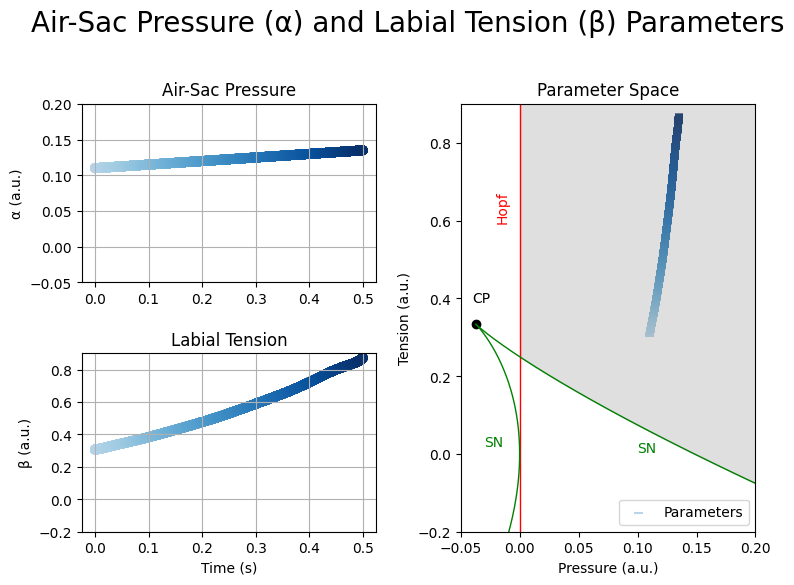

In [8]:
obj.p["gm"].set(value=1000)
obj_synth = obj.Solve(obj.p)

ploter.Plot(obj_synth)
ploter.PlotVs(obj_synth)
ploter.PlotAlphaBeta(obj_synth)
AudioPlay(obj_synth)

### Medium

$\gamma = 50000$

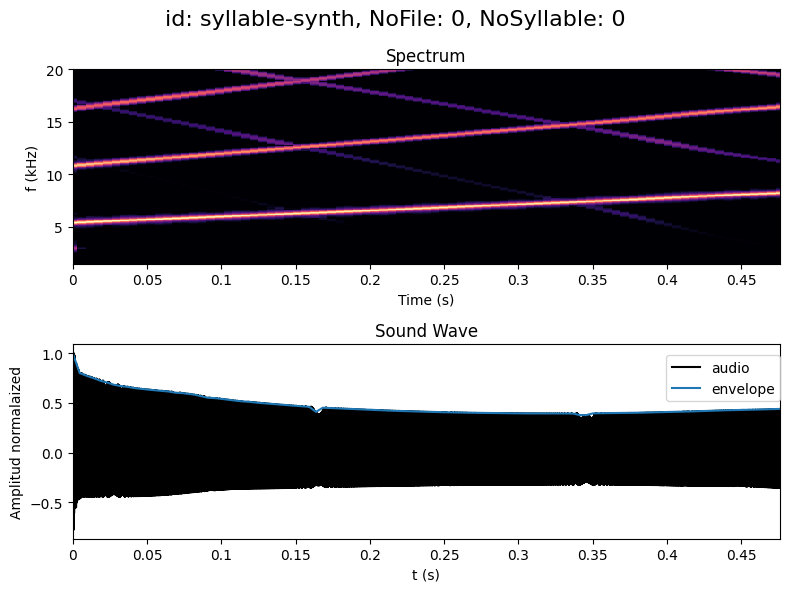

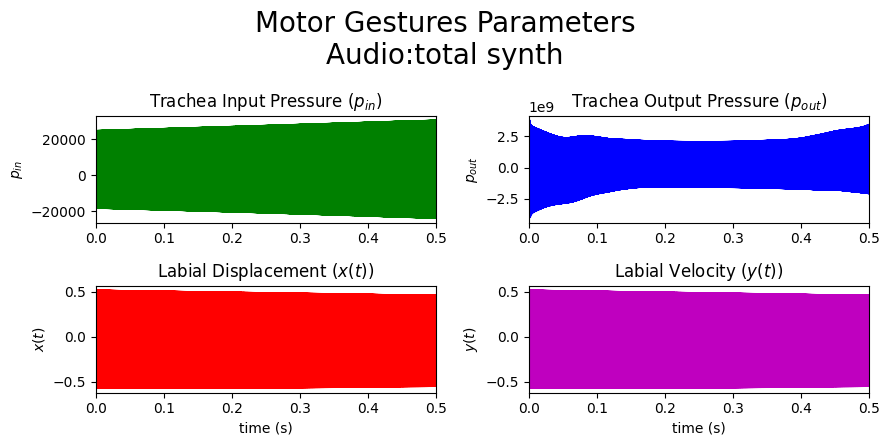

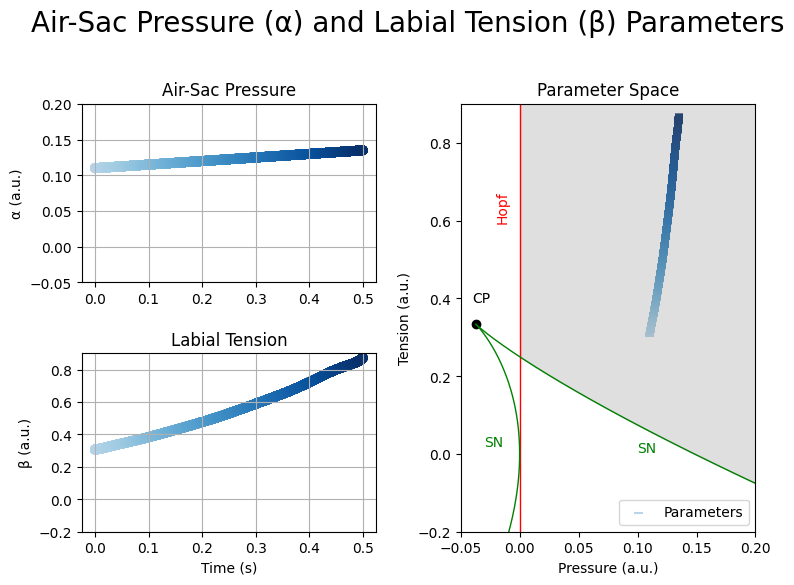

In [17]:
obj.p["gm"].set(value=50000)
obj_synth = obj.Solve(obj.p)

ploter.Plot(obj_synth)
ploter.PlotVs(obj_synth)
ploter.PlotAlphaBeta(obj_synth)
AudioPlay(obj_synth)

### High

$\gamma = 100000$

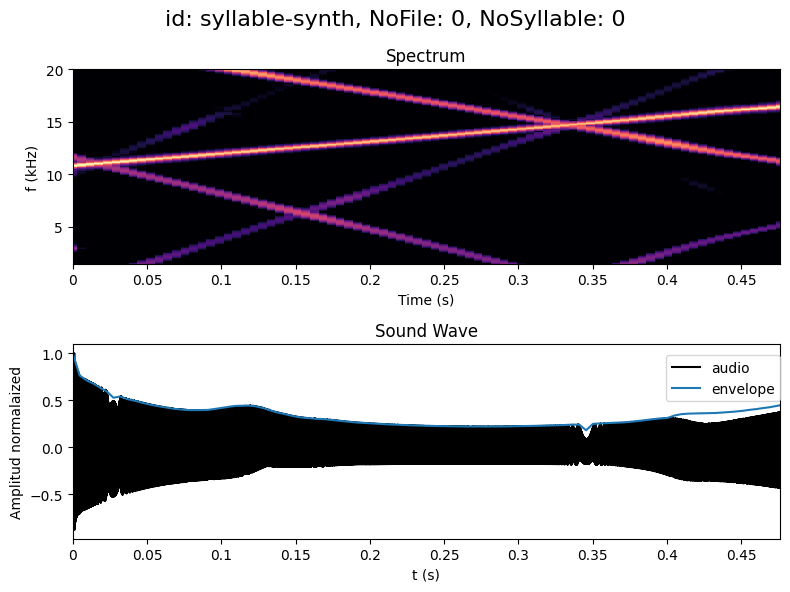

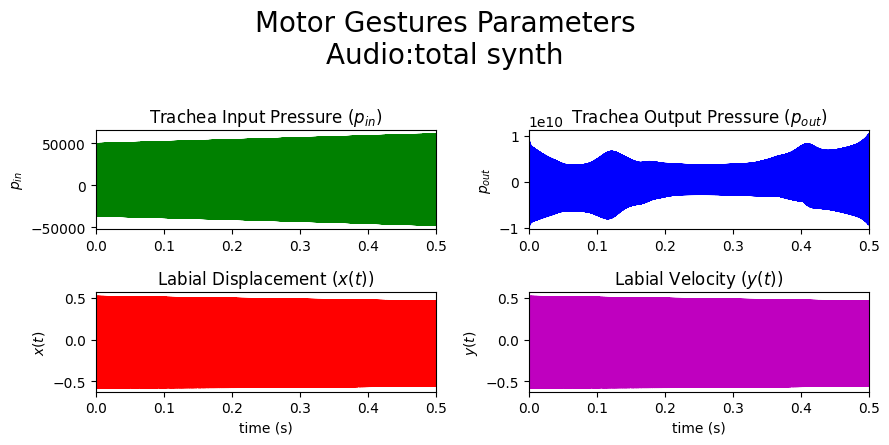

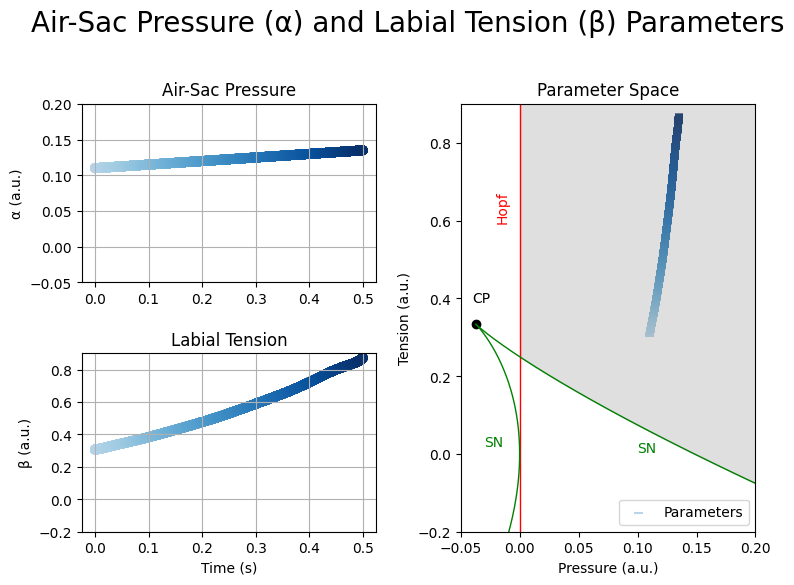

In [10]:
obj.p["gm"].set(value=100000)
obj_synth = obj.Solve(obj.p)

ploter.Plot(obj_synth)
ploter.PlotVs(obj_synth)
ploter.PlotAlphaBeta(obj_synth)
AudioPlay(obj_synth)

### Common Optimal $\gamma$ 

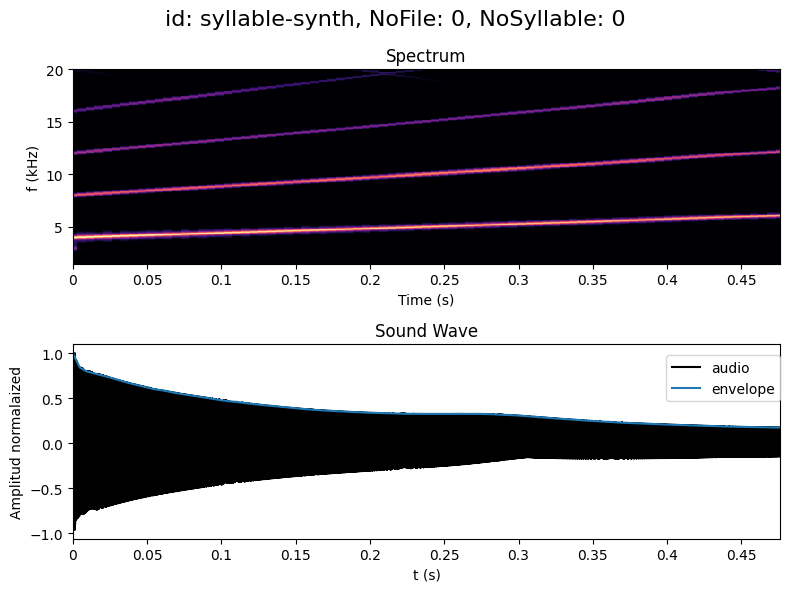

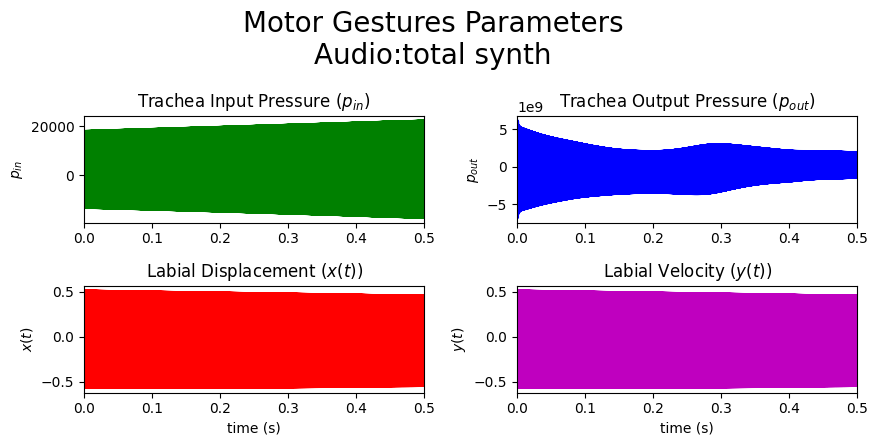

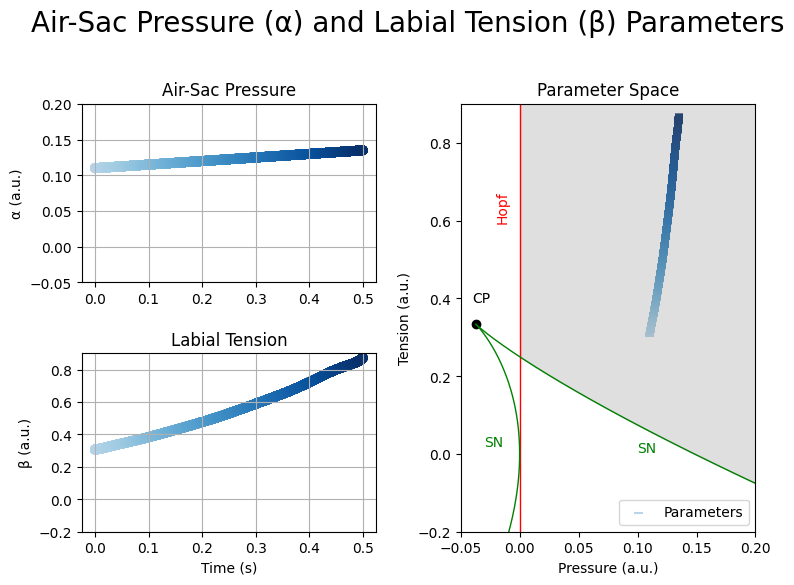

In [18]:
obj.p["gm"].set(value=37000)
obj_synth = obj.Solve(obj.p)

ploter.Plot(obj_synth)
ploter.PlotVs(obj_synth)
ploter.PlotAlphaBeta(obj_synth)
AudioPlay(obj_synth)

## Zero Parameters
How is the output signal when the labia and air-sac pressure values are zero?

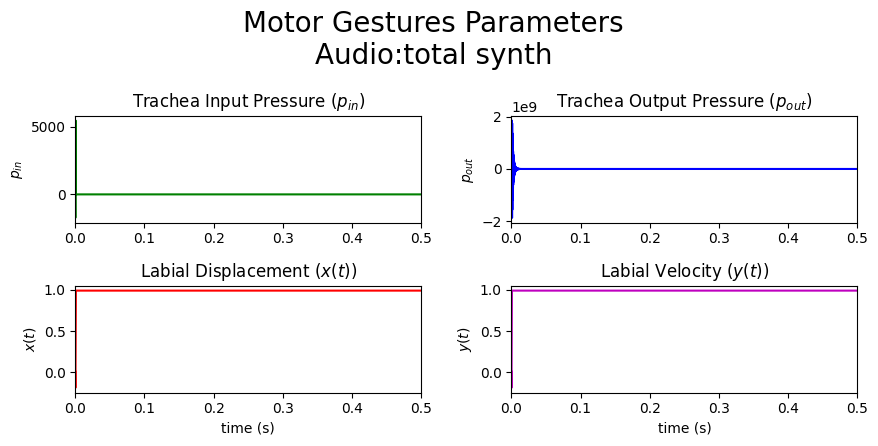

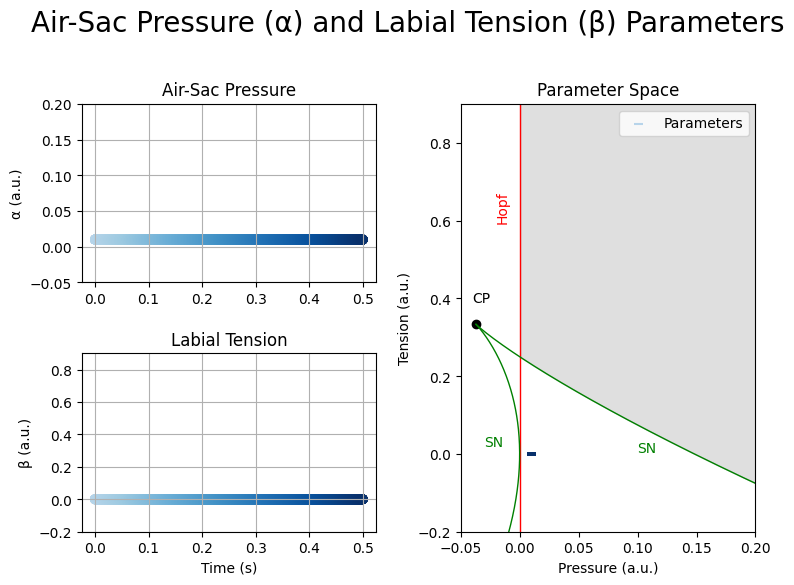

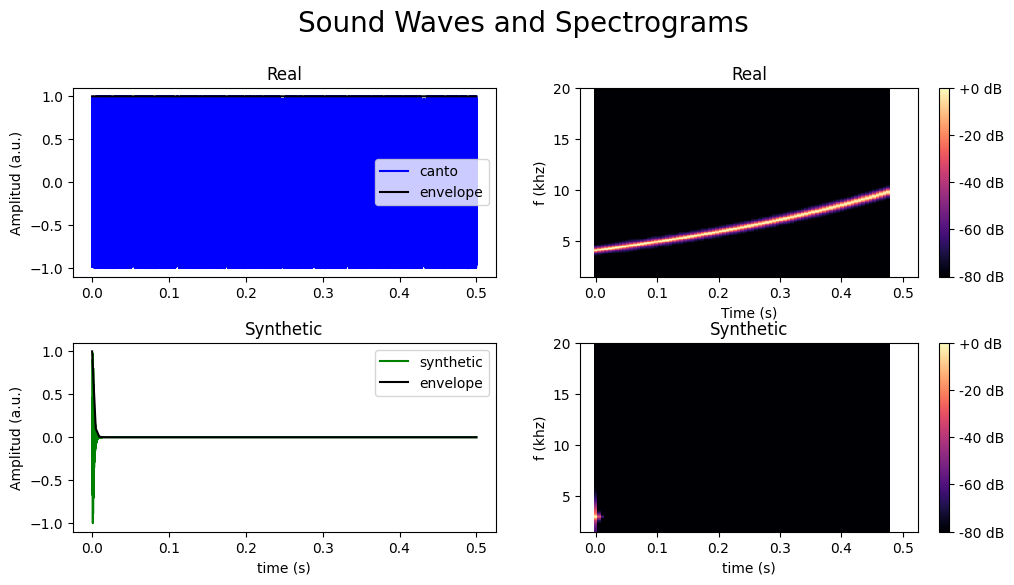

In [11]:
obj.p["a0"].set(value=0)
obj.p["a1"].set(value=0)
obj.p["a2"].set(value=0)
obj.p["b0"].set(value=0)
obj.p["b1"].set(value=0)
obj.p["b2"].set(value=0)
obj.p["gm"].set(value=40000)

obj_synth = obj.Solve(obj.p)

ploter.PlotVs(obj_synth)
ploter.PlotAlphaBeta(obj_synth)
ploter.Syllables(obj, obj_synth)
AudioPlay(obj_synth)

In [19]:
obj = bs.Syllable(sfs=[s, fs], ide="syllable")
obj.paths = paths

## Air Sac Pressure


### Low

$ a_0 = 0.01 $

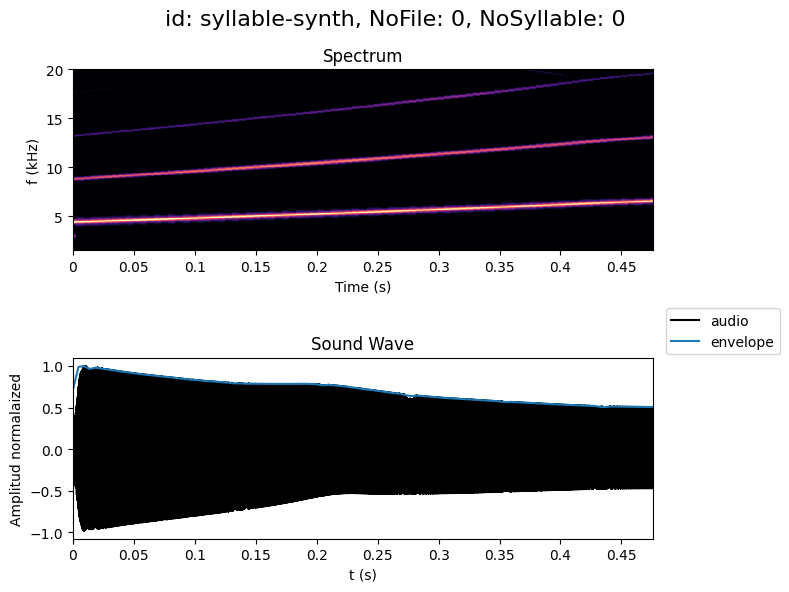

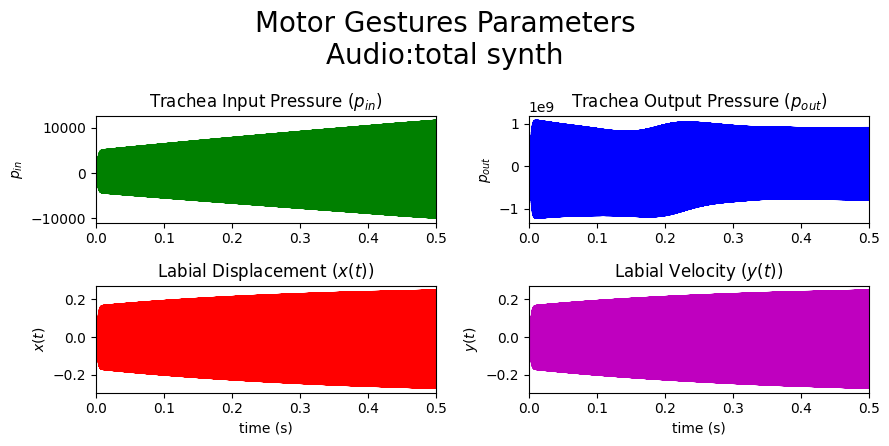

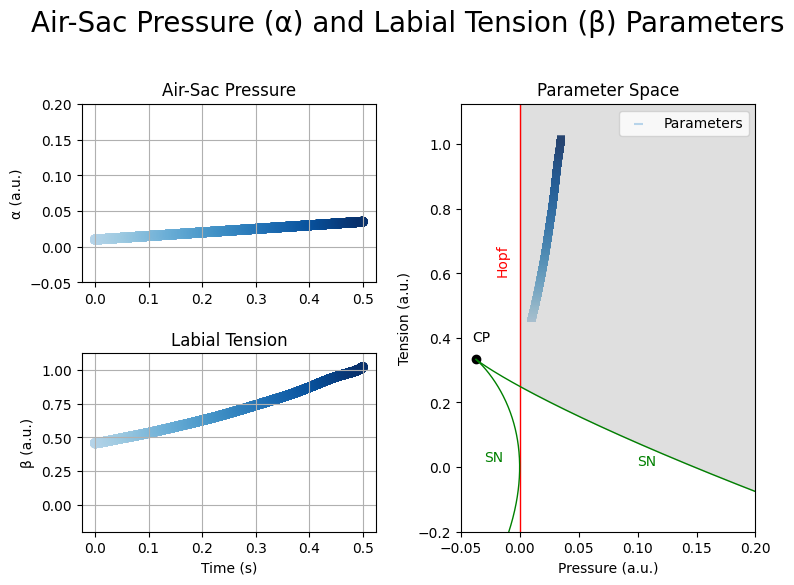

In [27]:
obj.p["a0"].set(value=.01)
obj_synth = obj.Solve(obj.p)

ploter.Plot(obj_synth)
ploter.PlotVs(obj_synth)
ploter.PlotAlphaBeta(obj_synth)
AudioPlay(obj_synth)

### Medium

$ a_0 = 0.11 $

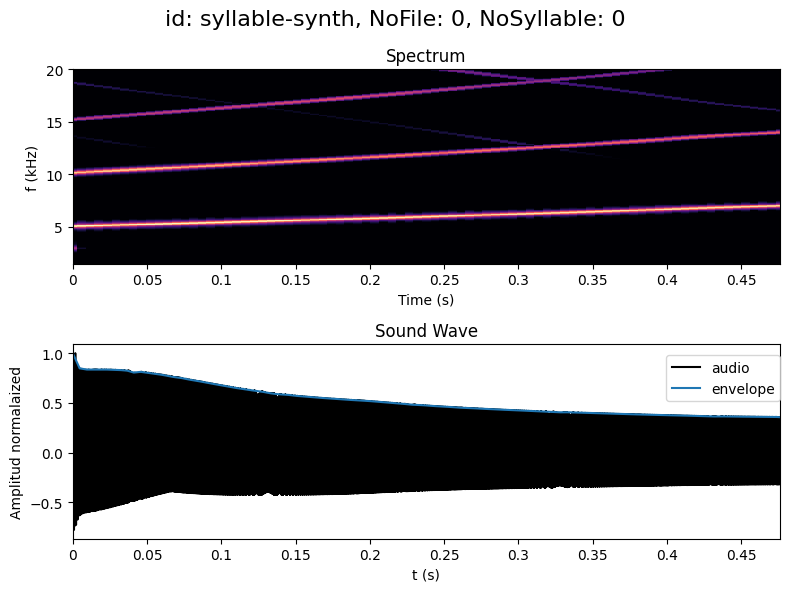

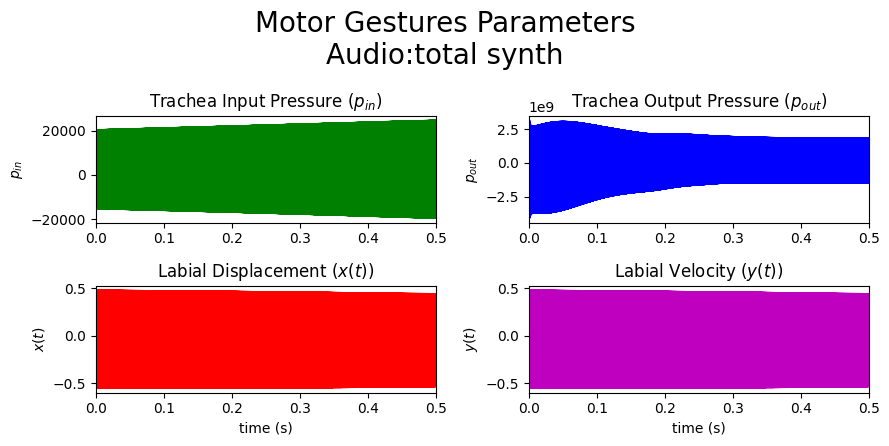

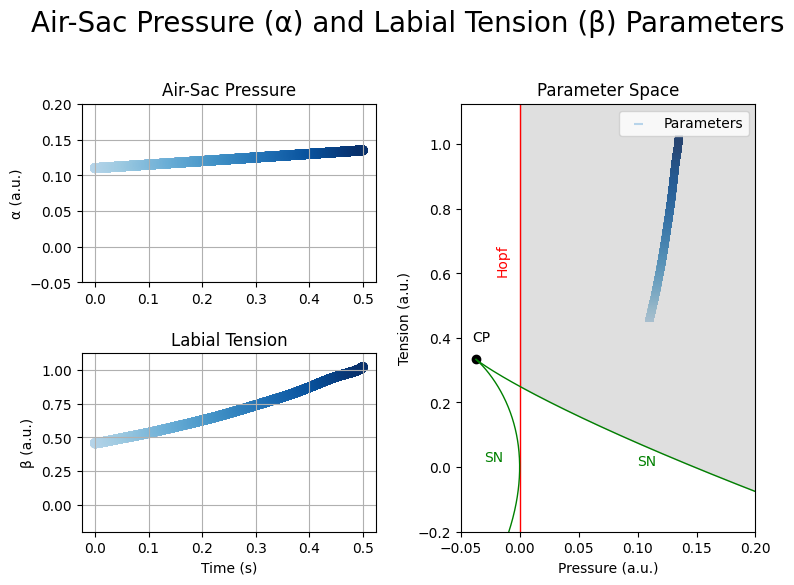

In [28]:
obj.p["a0"].set(value=.11)
obj_synth = obj.Solve(obj.p)

ploter.Plot(obj_synth)
ploter.PlotVs(obj_synth)
ploter.PlotAlphaBeta(obj_synth)
AudioPlay(obj_synth)

### High

$ a_0 = 1.25 $

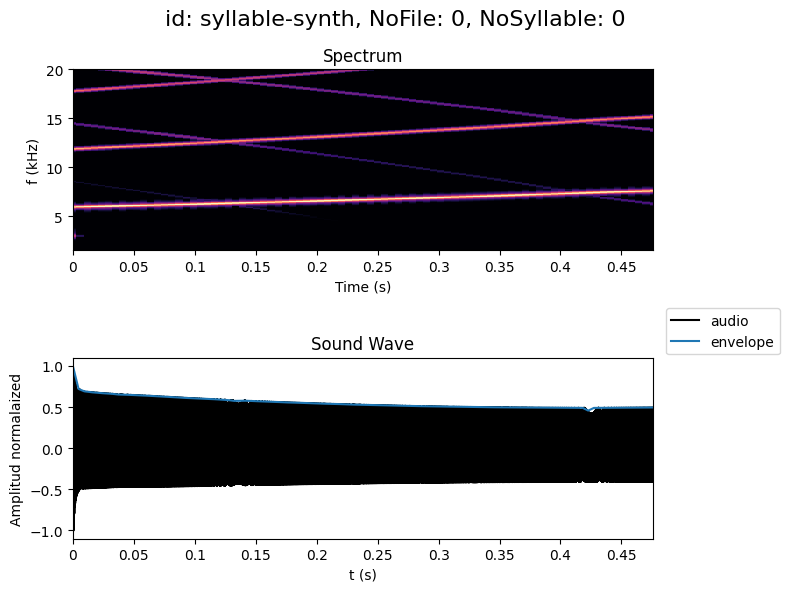

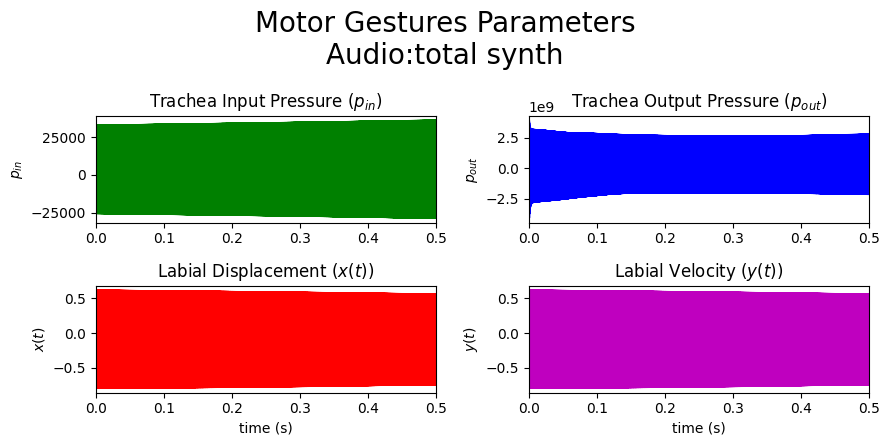

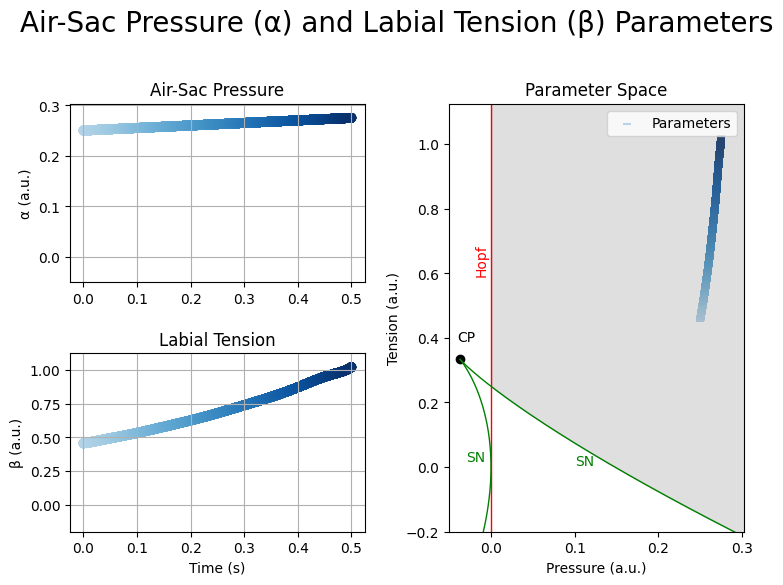

In [30]:
obj.p["a0"].set(value=1.25)
obj_synth = obj.Solve(obj.p)

ploter.Plot(obj_synth)
ploter.PlotVs(obj_synth)
ploter.PlotAlphaBeta(obj_synth)
AudioPlay(obj_synth)

## Varying Labia Tension


In [23]:
obj = bs.Syllable(sfs=[s, fs], ide="syllable")
obj.paths = paths

### Low 

$b_0 = -1$

In [ ]:
obj.p["b0"].set(value=-1.)
obj_synth = obj.Solve(obj.p)

ploter.Plot(obj_synth)
ploter.PlotVs(obj_synth)
ploter.PlotAlphaBeta(obj_synth)
AudioPlay(obj_synth)

### Medium

$b_0 = 0$

In [ ]:
obj.p["b0"].set(value=0)
obj_synth = obj.Solve(obj.p)

ploter.Plot(obj_synth)
ploter.PlotVs(obj_synth)
ploter.PlotAlphaBeta(obj_synth)
AudioPlay(obj_synth)

### High

$b_0 = 0.05$

In [ ]:
obj.p["b0"].set(value=0.05)
obj_synth = obj.Solve(obj.p)

ploter.Plot(obj_synth)
ploter.PlotVs(obj_synth)
ploter.PlotAlphaBeta(obj_synth)
AudioPlay(obj_synth)

# Bifurcation Change (In process)

To change the bifurcation function

In [ ]:
xs, ys, alpha, beta, gamma = sym.symbols('x y alpha beta gamma')
# obj.f1 = ys
# obj.f2 = (-alpha-beta*xs-xs**3+xs**2)*gamma**2 -(xs+1)*gamma*xs*ys